In [1]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [22]:
from xgboost import XGBRegressor
model = XGBRegressor(objective="reg:absoluteerror", early_stopping_rounds=100, tree_method="hist")

In [23]:
features = ['seconds_in_bucket', 'imbalance_buy_sell_flag',
               'imbalance_size', 'matched_size', 'bid_size', 'ask_size',
                'reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap']

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df[features]
y = df['target']
X = X[np.isfinite(y)]
y = y[np.isfinite(y)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
import joblib 
model_path ='/Users/alvin/Documents/GitHub/optiver_kaggle/optiver-trading-at-the-close/models'
models = []
TRAINING = True
N_fold = 5
index=np.arange(len(X_train))
def train_model():            
    if TRAINING:        
        model.fit(X_train[index%N_fold!=i], y_train[index%N_fold!=i], 
                    eval_set=[(X_train[index%N_fold==i], y_train[index%N_fold==i])], 
                    verbose=10                    
                    )
        models.append(model)
        joblib.dump(model, f'{model_path}/xgb_{i}.model')
        
    else:
        models.append(joblib.load(f'{model_path}/xgb_{i}.model'))

for i in range(N_fold):
    train_model()

[0]	validation_0-mae:6.38832
[10]	validation_0-mae:6.33252
[20]	validation_0-mae:6.31717
[30]	validation_0-mae:6.30830
[40]	validation_0-mae:6.30154
[50]	validation_0-mae:6.29556
[60]	validation_0-mae:6.29171
[70]	validation_0-mae:6.28849
[80]	validation_0-mae:6.28579
[90]	validation_0-mae:6.28391
[99]	validation_0-mae:6.28198
[0]	validation_0-mae:6.38043
[10]	validation_0-mae:6.32468
[20]	validation_0-mae:6.30959
[30]	validation_0-mae:6.30054
[40]	validation_0-mae:6.29301
[50]	validation_0-mae:6.28715
[60]	validation_0-mae:6.28331
[70]	validation_0-mae:6.28011
[80]	validation_0-mae:6.27773
[90]	validation_0-mae:6.27530
[99]	validation_0-mae:6.27342
[0]	validation_0-mae:6.37255
[10]	validation_0-mae:6.31684
[20]	validation_0-mae:6.30193
[30]	validation_0-mae:6.29172
[40]	validation_0-mae:6.28442
[50]	validation_0-mae:6.28036
[60]	validation_0-mae:6.27713
[70]	validation_0-mae:6.27384
[80]	validation_0-mae:6.27179
[90]	validation_0-mae:6.26953
[99]	validation_0-mae:6.26801
[0]	validatio

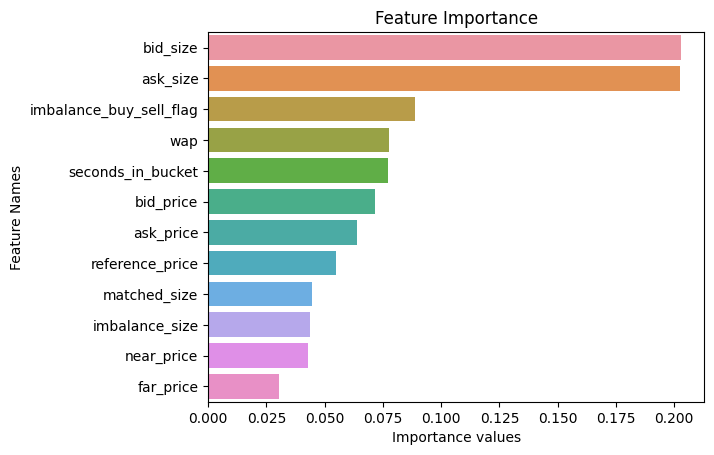

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = models[1].feature_importances_
fi_dict = {
    "importances":feature_importances,
    "feature_names":features
}
fi_df = pd.DataFrame(data=fi_dict)
fi_df.sort_values(by=['importances'], ascending=False, inplace=True)
sns.barplot(x=fi_df["importances"], y=fi_df["feature_names"])
plt.title("Feature Importance")
plt.xlabel("Importance values")
plt.ylabel("Feature Names")
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

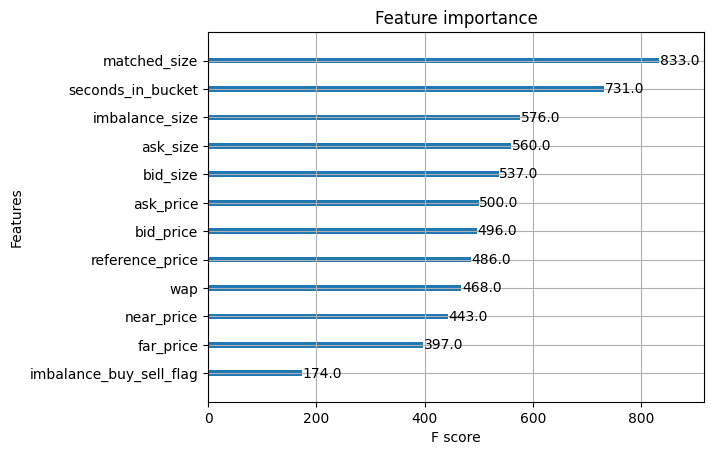

In [38]:
from xgboost import plot_importance
plot_importance(models[0], importance_type="weight")

In [39]:
from sklearn.metrics import mean_absolute_error
y_pred = np.mean([model.predict(X_test) for model in models], 0)
print(mean_absolute_error(y_pred, y_test))

6.269219408950893


In [ ]:
# import optiver2023
# env = optiver2023.make_env()
# iter_test = env.iter_test()

In [ ]:
# counter = 0
# for (test, revealed_targets, sample_prediction) in iter_test:
#     if counter == 0:
#         print(test.head(3))
#         print(revealed_targets.head(3))
#         print(sample_prediction.head(3))
#     sample_prediction['target']=model.predict(test[features])
#     env.predict(sample_prediction)
#     counter += 1

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
   stock_id  date_id  seconds_in_bucket  imbalance_size  \
0         0      478                  0      3753451.43   
1         1      478                  0       985977.11   
2         2      478                  0       599128.74   

   imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                       -1         0.999875   11548975.43        NaN   
1                       -1         1.000245    3850033.97        NaN   
2                        1         1.000584    4359198.25        NaN   

   near_price  bid_price  bid_size  ask_price  ask_size  wap   row_id  
0         NaN   0.999875  22940.00   1.000050   9177.60  1.0  478_0_0  
1         NaN   0.999940   1967.90   1.000601  19692.00  1.0  478_0_1  
2         NaN   0.999918   4488.22   1.000636  34955.12  1.0  478_0_2  
   stock_id  date_id  seconds_in_bucket  revealed_target  rev